# Assignment 3 - Text Analysis
An explanation this assignment could be found in the .pdf explanation document


## Materials to review for this assignment
<h4>From Moodle:</h4> 
<h5><u>Review the notebooks regarding the following python topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Working with strings</b> (tutorial notebook)<br/>
&#x2714; <b>Text Analysis</b> (tutorial notebook)<br/>
&#x2714; <b>Hebrew text analysis tools (tokenizer, wordnet)</b> (moodle example)<br/>
&#x2714; <b>(brief review) All previous notebooks</b><br/>
</div> 
<h5><u>Review the presentations regarding the following topics</u>:</h5>
<div class="alert alert-info">
&#x2714; <b>Text Analysis</b> (lecture presentation)<br/>
&#x2714; <b>(brief review) All other presentations</b><br/>
</div>

## Personal Details:

In [1]:
# Details Student 1:
# Daniel Dolberg - 324064872
# dolbergdani@gmail.com

# Details Student 2:
# Mor Cohen - 313201246
# morxmor.c@gmail.com

## Preceding Step - import modules (packages)
This step is necessary in order to use external modules (packages). <br/>

In [2]:
# --------------------------------------
import pandas as pd
import numpy as np
# --------------------------------------


# --------------------------------------
# ------------- visualizations:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# --------------------------------------


# ---------------------------------------
import sklearn
from sklearn import preprocessing, metrics, pipeline, model_selection, feature_extraction 
from sklearn import naive_bayes, linear_model, svm, neural_network, neighbors, tree
from sklearn import decomposition, cluster

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error, r2_score, silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import Perceptron, SGDClassifier
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# ---------------------------------------


# ----------------- output and visualizations: 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
# show several prints in one cell. This will allow us to condence every trick in one cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# ---------------------------------------

### Text analysis and String manipulation imports:

In [3]:
# --------------------------------------
# --------- Text analysis and Hebrew text analysis imports:
# vectorizers:
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# --------------------------------------

### (optional) Hebrew text analysis - WordNet (for Hebrew)
Note: the WordNet is not a must

#### (optional) Only if you didn't install Wordnet (for Hebrew) use:

### (optional) Hebrew text analysis - hebrew_tokenizer (Tokenizer for Hebrew)
Note: the hebrew_tokenizer is not a must

#### (optional) Only if you didn't install hebrew_tokenizer use:

In [4]:
# Hebrew tokenizer installation:
# unmark if you want to use and need to install:
# !pip install hebrew_tokenizer
import wn

In [5]:
# Hebrew tokenizer import:

# unmark if you want to use:
# import hebrew_tokenizer as ht

#!pip install plotly
#!pip install wordcloud

### extra modules

In [6]:
# mechine learning
from sklearn.metrics import make_scorer
from sklearn.linear_model import LogisticRegression

#ERD
from wordcloud import WordCloud

### Reading input files
Reading input files for train annotated corpus (raw text data) corpus and for the test corpus

In [7]:
train_filename = 'annotated_corpus_for_train.csv'
test_filename  = 'corpus_for_test.csv'
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

In [8]:
df_train.head(8)
df_train.shape

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f
5,לפני כ3 חודשים טסתי לרומא למשך שבוע. טסתי במטו...,f
6,אני כבר שנתיים נשוי והשנה אני ואישתי סוף סוף י...,m
7,השנה התחלנו שיפוץ בדירה שלנו בתל אביב. הדירה ה...,f


(753, 2)

In [9]:
df_test.head(3)
df_test.shape

,test_example_id,story
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""..."
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...


(323, 2)

### Your implementation:
Write your code solution in the following code-cells

In [10]:
#we will firstly import some EDA modules
import plotly.express as px
from wordcloud import WordCloud

## Data Visualisation

#### firstly we will replace the gatecorical column with ones and zeros
female = 0
male = 1

In [11]:
#Male = 1, Female = 0

df_full = df_train.copy()
df_full = df_full.append(df_test)

df_erd = df_train.copy()

df_erd["gender"] = df_erd["gender"].astype('category')
replace_m={'m': 0, 'f': 1}
df_erd.replace(replace_m, inplace = True)

df_erd

,story,gender
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",0
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,0
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,1
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",0
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,1
...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,0
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,0
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,0
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",1


### now lets try to find some differences between stories by men and women
firstly let's see if there is difference in word count

let's add a new category called "word count" so that we can plot it easily

In [12]:
num_of_words = [len(text) for text in df_erd["story"]]
df_erd["num of words"] = num_of_words

Text(0.5, 0, 'Story index number')

Text(0, 0.5, 'Number of Words')

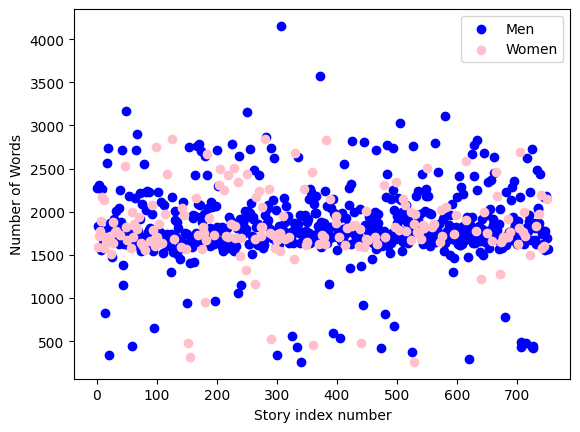

In [13]:
df_male = df_erd[df_erd["gender"] == 0]
df_female = df_erd[df_erd["gender"] == 1]


# Create a scatter plot with different colors for men and women
plt.scatter(x = df_male["num of words"].index ,y = df_male["num of words"] , color='blue', label='Men',alpha = 1)
plt.scatter(x = df_female["num of words"].index ,y = df_female["num of words"] , color='pink', label='Women',alpha = 1)

plt.legend()
plt.xlabel("Story index number")
plt.ylabel("Number of Words")

### we clearly have a problem here
there are way more men than women, we also see that there is are a lot of outliers and that gender has no real impact on the amount of words

<Axes: ylabel='amount of stories'>

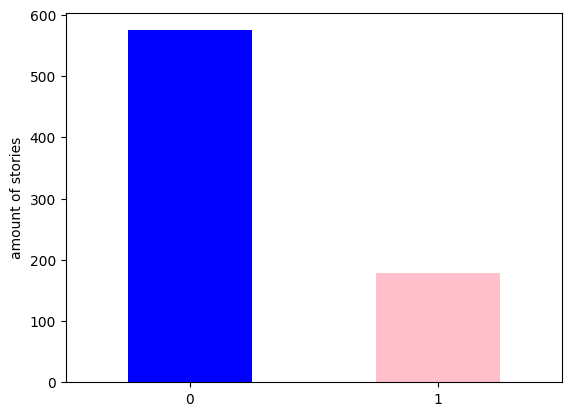

In [14]:
df_erd['gender'].value_counts(normalize=False).plot.bar(color=["blue","pink"],ylabel = "amount of stories",rot = 0,x = ["men","women"])
#df_erd['gender'].value_counts(normalize=False).plot(kind='pie', colormap = "coolwarm", labels = ["man","women"], autopct='%1.1f%%')

<Axes: xlabel='num of words'>

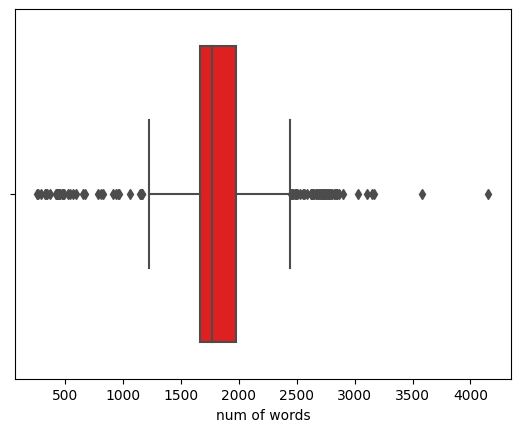

In [15]:
sns.boxplot(x = df_erd["num of words"], color = "red")

lets remove outliers

<Axes: ylabel='amount of stories'>

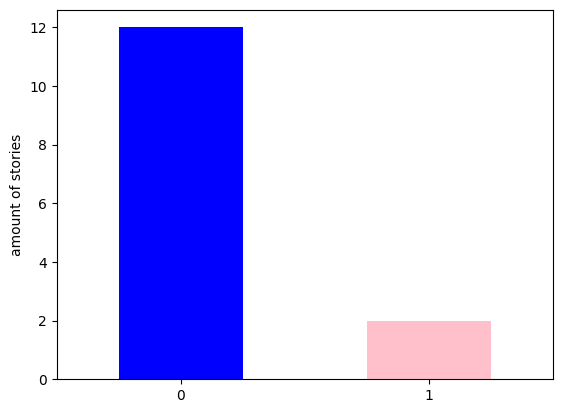

In [16]:
df_erd2 = df_erd[df_erd["num of words"] < 450]
df_erd2 = df_erd2[df_erd2["num of words"] > 250]

#df_erd2['gender'].value_counts(normalize=False).plot(kind='pie', colormap = "coolwarm", labels = ["man","women"], autopct='%1.1f%%')
df_erd2['gender'].value_counts(normalize=False).plot.bar(color=["blue","pink"],ylabel = "amount of stories",rot = 0,x = ["men","women"])


Text(0.5, 0, 'Story index number')

Text(0, 0.5, 'Number of Words')

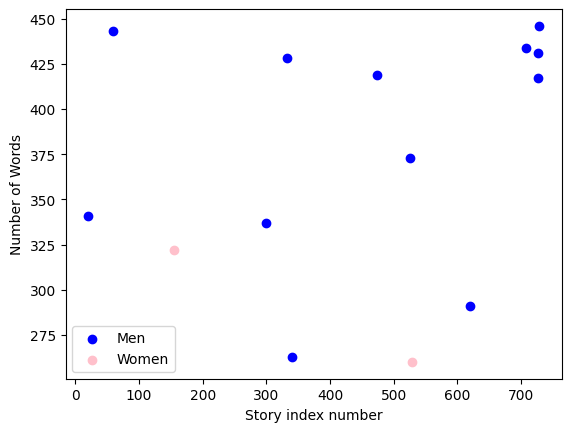

In [17]:
df_male = df_erd2[df_erd2["gender"] == 0]
df_female = df_erd2[df_erd2["gender"] == 1]


# Create a scatter plot with different colors for men and women
plt.scatter(x = df_male["num of words"].index ,y = df_male["num of words"] , color='blue', label='Men',alpha = 1)
plt.scatter(x = df_female["num of words"].index ,y = df_female["num of words"] , color='pink', label='Women',alpha = 1)

plt.legend()
plt.xlabel("Story index number")
plt.ylabel("Number of Words")

since we don't have a lot of samples already, and removing them doesn't really help with the bias. we will give up on the "number of words" column since it also doesn't really help us with the analysis

#### let's see however if there's a difference brtween the ways men and women use Punctuation

In [18]:
df_erd = df_train.copy()


df_erd["?"] =  [x.count("?") for x in df_erd["story"]]
df_erd["!"] =  [x.count("!") for x in df_erd["story"]]
df_erd["."] =  [x.count(".") for x in df_erd["story"]]
df_erd[","] =  [x.count("'") for x in df_erd["story"]]
df_erd['"'] =  [x.count('"') for x in df_erd["story"]]
df_erd["("] =  [x.count('(') for x in df_erd["story"]]


df_erd

,story,gender,?,!,.,",","""",(
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m,5,7,24,0,1,7
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m,0,4,22,3,3,2
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f,0,0,13,0,4,1
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m,3,2,30,1,8,0
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f,0,3,8,0,0,0
...,...,...,...,...,...,...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,m,0,0,21,0,1,1
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,m,0,0,15,0,0,0
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,m,2,0,3,0,4,1
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",f,1,0,16,1,10,0


In [19]:
punks = ('.',',','?','!','"',"(")

df_male = df_erd[df_erd["gender"] == 'm']
df_female = df_erd[df_erd["gender"] == 'f']

for i in range(len(punks)):
    f = plt.figure(i)
    #plt.scatter(x = df_male[punks[i]].index ,y = df_male[punks[i]] , color='blue', label='Men',alpha = 1)
    #plt.scatter(x = df_female[punks[i]].index ,y = df_female[punks[i]] , color='pink', label='Women',alpha = 1)
    #plt.bar(x = df_male[punks[i]].index ,height = df_male[punks[i]] , color='blue', label='Men',alpha = 1)
    #plt.bar(x = df_male[punks[i]].index ,height = df_male[punks[i]].s , color='blue', label='Men',alpha = 1)
    #plt.title('amounts of "'+punks[i]+ '" per gender')
    #f.show()
    

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='gender', ylabel='Count'>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Total Count')

Text(0.5, 1.0, 'Total of ? ! , . " and (  by Gender')

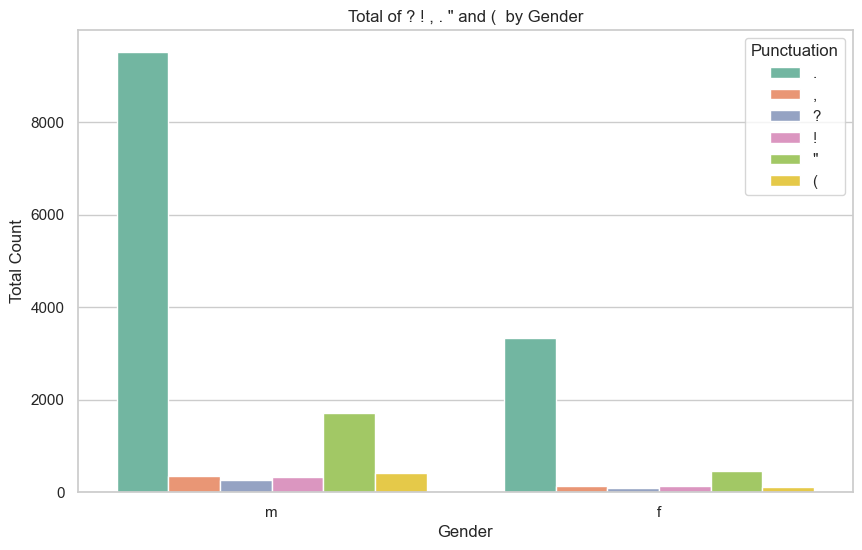

In [20]:
# Melt the DataFrame to make it suitable for the bar plot
melted = pd.melt(df_erd, id_vars=['gender'], 
                 value_vars=punks, 
                 var_name='Punctuation', value_name='Count')

# Calculate the total sum of each punctuation mark
total_sums = melted.groupby('Punctuation')['Count'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# Create a bar plot with hue for punctuation type and set height
sns.barplot(x='gender', y='Count', hue='Punctuation', data=melted, palette='Set2', 
            errorbar=None, estimator=sum, hue_order=punks)

plt.xlabel('Gender')
plt.ylabel('Total Count')
plt.title('Total of ' + '? ! , . " and ( ' + ' by Gender')
plt.legend(title='Punctuation')

plt.show()

### again, unfortuanatly due to the bias in the results, it's hard to see what matters, let's try to use a table of means instead

In [21]:
# Group by 'gender' and calculate the means for each column
means_by_gender = df_erd.groupby('gender').mean().reset_index()

# Display the table
means_by_gender

,gender,?,!,.,",","""",(
0,f,0.528,0.787,18.775,0.713,2.567,0.697
1,m,0.471,0.563,16.534,0.609,2.963,0.727


### now we can see more clearly, that despite women being the minority in our data, they on avarage use more question marks, exclamation points, full stops and commas

it seems that woman pay more attesntion to the structure of the sentence which may help us identify the writer's gender

### Now let's see how many words have the letter ה at the end 

In [22]:
def seperateHei(df):

    for i in range(df.shape[0]):
        df.iloc[i,0] = df.iloc[i,0].strip().split(" ")
        for j in range( len(df.iloc[i,0]) ):
            if df.iloc[i,0][j] != '' and df.iloc[i,0][j][-1] == 'ה':
                df.iloc[i,0][j] = df.iloc[i,0][j][:-1] + ' ה'
        df.iloc[i,0] = " ".join(df.iloc[i,0])

def fixTokens(df):
    punks = ('.',',','?','!','"',"(")
    
    for i in range(df.shape[0]):
        for p in punks:
            df.iloc[i,0] =  df.iloc[i,0].replace(p, ' '+p+' ')
            
        df.iloc[i,0] = df.iloc[i,0].strip()
    #seperateHei(df)


heis = []

for story in df_erd["story"]:
    arr = story.split(" ")
    c = 0
    for x in arr:
        if x != '' and x[-1] == 'ה':
            c+=1
    heis.append(c)

df_erd["h"] = heis

df_erd

,story,gender,?,!,.,",","""",(,h
0,"כשחבר הזמין אותי לחול, לא באמת חשבתי שזה יקרה,...",m,5,7,24,0,1,7,62
1,לפני שהתגייסתי לצבא עשיתי כל מני מיונים ליחידו...,m,0,4,22,3,3,2,38
2,מאז שהתחילו הלימודים חלומו של כל סטודנט זה הפנ...,f,0,0,13,0,4,1,55
3,"כשהייתי ילד, מטוסים היה הדבר שהכי ריתק אותי. ב...",m,3,2,30,1,8,0,43
4,‏הייתי מדריכה בכפר נוער ומתאם הכפר היינו צריכי...,f,0,3,8,0,0,0,34
...,...,...,...,...,...,...,...,...,...
748,אז לפני שנה בדיוק טסתי לאמסטרדם עם שני חברים ט...,m,0,0,21,0,1,1,51
749,שבוע שעבר העליתי באופן ספונטני רעיון לנסוע עם ...,m,0,0,15,0,0,0,55
750,לפני חודש עברנו לדירה בבית שמש בעקבות משפחתי ה...,m,2,0,3,0,4,1,51
751,"החוויה אותה ארצה לשתף התרחשה לפני כמה חודשים, ...",f,1,0,16,1,10,0,48


In [23]:
# Group by 'gender' and calculate the means for each column
means_by_gender = df_erd.groupby('gender').mean().reset_index()

# Display the table
means_by_gender

,gender,?,!,.,",","""",(,h
0,f,0.528,0.787,18.775,0.713,2.567,0.697,44.382
1,m,0.471,0.563,16.534,0.609,2.963,0.727,44.934


### Mechinge Learning

In [24]:
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

fixTokens(df_train)


df_train["gender"] = df_train["gender"].astype('category')
replace_m={'m': 0, 'f': 1}
df_train.replace(replace_m, inplace = True)

In [25]:
max_samps = df_train.shape[0]

model_params = {
        'LogisticRegression': {
        'vectorizer': [TfidfVectorizer(min_df=5,max_df=max_samps)],
        'vectorizer__max_features': [None, 2000],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [LogisticRegression(class_weight='balanced')],
        'classifier__penalty': ['l1','l2']
        },
        'MultinomialNaiveBayes': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=max_samps)],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False)],
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.01],
        },
        'Perceptron': {
        'vectorizer': [TfidfVectorizer(min_df=5, max_df=max_samps)],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False)],
        'classifier': [Perceptron()],
        'classifier__penalty': ['l1','l2'],
        },
        'KNN': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=max_samps), TfidfVectorizer()],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1, 1), (1, 2),(1,3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [5, 50],
        'classifier__p': [1, 2]
        },
        'DecisionTree': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=max_samps)],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1,1),(1,2),(1,3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [DecisionTreeClassifier()],
        },
}

In [26]:
# Machine learning model fitting.

X = df_train["story"]
y = df_train["gender"]

# Create a pipeline
pipeline = Pipeline([
    ('vectorizer', None),
    ('scaler', None),
    ('classifier', None)
])

# We're using the KFold cross-validation method to improve our models' accuracies
cv = model_selection.KFold(n_splits = 5)

# Define F1 macro scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Perform grid search over the models_params dictionary
results = []
for model_name, model_params in model_params.items():
    print(f"\n\n\nGrid search for {model_name}:\n")
    clf = GridSearchCV(pipeline, model_params, cv=cv, scoring=f1_scorer, verbose=1,n_jobs=10)
    clf.fit(X, y)

    # Get the best hyperparameters
    best_params = clf.best_params_

    # Perform cross-validation with the specified scoring method
    cv_scores = cross_val_score(clf.best_estimator_, X, y, scoring=f1_scorer, cv=10)

    # Calculate the mean of cv_scores
    cv_mean_score = np.mean(cv_scores)

    # Store the results
    result = {
        "model_name": model_name,
        "best_params": best_params,
        "cv_mean_score": cv_mean_score
    }
    results.append(result)

    # Print the results for the current clf
    print(f"Best hyperparameters:\n{best_params}")
    print(f"Cross-validated F1 macro mean score:\n{cv_mean_score:.4f}") 
    print("\n*********************************************************\n")

# Print the final results
for result in results:
    print(f"Model:\n{result['model_name']}")
    print(f"Best hyperparameters:\n{result['best_params']}")
    print(f"Cross-validated F1 macro mean score:\n{result['cv_mean_score']:.4f}") 
    print("\n*********************************************************\n")




Grid search for LogisticRegression:

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [LogisticRegression(class_weight='balanced')],
                         'classifier__penalty': ['l1', 'l2'],
                         'scaler': [StandardScaler(with_mean=False),
                                    MinMaxScaler()],
                         'vectorizer': [TfidfVectorizer(max_df=753,
                                                        max_features=2000,
                                                        min_df=5)],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': LogisticRegression(class_weight='balanced'), 'classifier__penalty': 'l2', 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_df=753, max_features=2000, min_df=5), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.6815

*********************************************************




Grid search for MultinomialNaiveBayes:

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [MultinomialNB(alpha=0.01)],
                         'classifier__alpha': [0.01],
                         'scaler': [StandardScaler(with_mean=False)],
                         'vectorizer': [CountVectorizer(max_df=753,
                                                        max_features=2000,
                                                        min_df=5)],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': MultinomialNB(alpha=0.01), 'classifier__alpha': 0.01, 'scaler': StandardScaler(with_mean=False), 'vectorizer': CountVectorizer(max_df=753, max_features=2000, min_df=5), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.6385

*********************************************************




Grid search for Perceptron:

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [Perceptron(penalty='l1')],
                         'classifier__penalty': ['l1', 'l2'],
                         'scaler': [StandardScaler(with_mean=False)],
                         'vectorizer': [TfidfVectorizer(max_df=753, min_df=5,
                                                        ngram_range=(1, 3))],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': Perceptron(penalty='l1'), 'classifier__penalty': 'l1', 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_df=753, min_df=5, ngram_range=(1, 3)), 'vectorizer__ngram_range': (1, 3)}
Cross-validated F1 macro mean score:
0.6930

*********************************************************




Grid search for KNN:

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [KNeighborsClassifier()],
                         'classifier__n_neighbors': [5, 50],
                         'classifier__p': [1, 2],
                         'scaler': [StandardScaler(with_mean=False),
                                    MinMaxScaler()],
                         'vectorizer': [CountVectorizer(max_df=753, min_df=5),
                                        TfidfVectorizer(max_features=2000)],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 5, 'classifier__p': 2, 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_features=2000), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.5365

*********************************************************




Grid search for DecisionTree:

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [DecisionTreeClassifier()],
                         'scaler': [StandardScaler(with_mean=False),
                                    MinMaxScaler()],
                         'vectorizer': [CountVectorizer(max_df=753, min_df=5,
                                                        ngram_range=(1, 3))],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': DecisionTreeClassifier(), 'scaler': StandardScaler(with_mean=False), 'vectorizer': CountVectorizer(max_df=753, min_df=5, ngram_range=(1, 3)), 'vectorizer__max_features': None, 'vectorizer__ngram_range': (1, 3)}
Cross-validated F1 macro mean score:
0.6021

*********************************************************

Model:
LogisticRegression
Best hyperparameters:
{'classifier': LogisticRegression(class_weight='balanced'), 'classifier__penalty': 'l2', 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_df=753, max_features=2000, min_df=5), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.6815

*********************************************************

Model:
MultinomialNaiveBayes
Best hyperparameters:
{'classifier': MultinomialNB(alpha=0.01), 'classifier__alpha': 0.01, 'scaler': StandardScaler(with_mean=False), 'vectorizer': CountVectorizer(max_df=753, max_features=2000,

In [27]:
df_res = pd.DataFrame(results)
df_res.drop("best_params", axis = 1)

,model_name,cv_mean_score
0,LogisticRegression,0.682
1,MultinomialNaiveBayes,0.638
2,Perceptron,0.693
3,KNN,0.537
4,DecisionTree,0.602


In [28]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=max_samps, max_features=2000, min_df=5, ngram_range = (1, 1))),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(penalty = 'l2', class_weight='balanced'))
])

# # Fit the pipeline to the training data with the best estimator
pipeline.fit(df_train['story'], y) # y is binary (1 for female)

# Make predictions on the test data
y_pred_test = pipeline.predict(df_test['story'])

# Sample first and last 5 rows of df_test and predict on them
df_predicted = df_test.copy()
df_predicted['predicted_category'] = y_pred_test
df_predicted['predicted_category'] = pd.Series(y_pred_test).map({0: 'm', 1: 'f'})

# Print it out
df_predicted

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=753, max_features=2000, min_df=5)),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier', LogisticRegression(class_weight='balanced'))])

,test_example_id,story,predicted_category
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...,m
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""...",m
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...,m
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני...",f
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...,f
...,...,...,...
318,318,"בשנה האחרונה הרגשתי די תקוע בעבודה, השגרה הפכה...",m
319,319,אני ואילן חברים טובים מזה 20 שנה תמיד חלמנו לפ...,m
320,320,מידי יום שישי אני נוהג לנסוע בתחבורה ציבורית ס...,m
321,321,"לפני מספר חודשים, בשיא התחלואה של הגל השני, עמ...",m


# Now lets see what happens if woman are 0 and men are 1

In [29]:
df_train = pd.read_csv(train_filename, index_col=None, encoding='utf-8')
df_test  = pd.read_csv(test_filename, index_col=None, encoding='utf-8')

fixTokens(df_train)


df_train["gender"] = df_train["gender"].astype('category')
replace_m={'m': 1, 'f': 0}
df_train.replace(replace_m, inplace = True)

In [30]:
max_samps = df_train.shape[0]

model_params = {
        'LogisticRegression': {
        'vectorizer': [TfidfVectorizer(min_df=5,max_df=max_samps)],
        'vectorizer__max_features': [None, 2000],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [LogisticRegression(class_weight='balanced')],
        'classifier__penalty': ['l1','l2']
        },
        'MultinomialNaiveBayes': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=max_samps)],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False)],
        'classifier': [MultinomialNB()],
        'classifier__alpha': [0.01],
        },
        'Perceptron': {
        'vectorizer': [TfidfVectorizer(min_df=5, max_df=max_samps)],
        'vectorizer__ngram_range': [(1, 1),(1, 2),(1, 3)],
        'scaler': [StandardScaler(with_mean=False)],
        'classifier': [Perceptron()],
        'classifier__penalty': ['l1','l2'],
        },
        'KNN': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=max_samps), TfidfVectorizer()],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1, 1), (1, 2),(1,3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [5, 50],
        'classifier__p': [1, 2]
        },
        'DecisionTree': {
        'vectorizer': [CountVectorizer(min_df=5, max_df=max_samps)],
        'vectorizer__max_features':[None, 2000],
        'vectorizer__ngram_range': [(1,1),(1,2),(1,3)],
        'scaler': [StandardScaler(with_mean=False), MinMaxScaler()],
        'classifier': [DecisionTreeClassifier()],
        },
}

In [31]:
# Machine learning model fitting.

X = df_train["story"]
y = df_train["gender"]

# Create a pipeline
pipeline = Pipeline([
    ('vectorizer', None),
    ('scaler', None),
    ('classifier', None)
])

# We're using the KFold cross-validation method to improve our models' accuracies
cv = model_selection.KFold(n_splits = 5)

# Define F1 macro scorer
f1_scorer = make_scorer(f1_score, average='macro')

# Perform grid search over the models_params dictionary
results = []
for model_name, model_params in model_params.items():
    print(f"\n\n\nGrid search for {model_name}:\n")
    clf = GridSearchCV(pipeline, model_params, cv=cv, scoring=f1_scorer, verbose=1,n_jobs=10)
    clf.fit(X, y)

    # Get the best hyperparameters
    best_params = clf.best_params_

    # Perform cross-validation with the specified scoring method
    cv_scores = cross_val_score(clf.best_estimator_, X, y, scoring=f1_scorer, cv=10)

    # Calculate the mean of cv_scores
    cv_mean_score = np.mean(cv_scores)

    # Store the results
    result = {
        "model_name": model_name,
        "best_params": best_params,
        "cv_mean_score": cv_mean_score
    }
    results.append(result)

    # Print the results for the current clf
    print(f"Best hyperparameters:\n{best_params}")
    print(f"Cross-validated F1 macro mean score:\n{cv_mean_score:.4f}") 
    print("\n*********************************************************\n")

# Print the final results
for result in results:
    print(f"Model:\n{result['model_name']}")
    print(f"Best hyperparameters:\n{result['best_params']}")
    print(f"Cross-validated F1 macro mean score:\n{result['cv_mean_score']:.4f}") 
    print("\n*********************************************************\n")




Grid search for LogisticRegression:

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [LogisticRegression(class_weight='balanced')],
                         'classifier__penalty': ['l1', 'l2'],
                         'scaler': [StandardScaler(with_mean=False),
                                    MinMaxScaler()],
                         'vectorizer': [TfidfVectorizer(max_df=753,
                                                        max_features=2000,
                                                        min_df=5)],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': LogisticRegression(class_weight='balanced'), 'classifier__penalty': 'l2', 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_df=753, max_features=2000, min_df=5), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.6815

*********************************************************




Grid search for MultinomialNaiveBayes:

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [MultinomialNB(alpha=0.01)],
                         'classifier__alpha': [0.01],
                         'scaler': [StandardScaler(with_mean=False)],
                         'vectorizer': [CountVectorizer(max_df=753,
                                                        max_features=2000,
                                                        min_df=5)],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': MultinomialNB(alpha=0.01), 'classifier__alpha': 0.01, 'scaler': StandardScaler(with_mean=False), 'vectorizer': CountVectorizer(max_df=753, max_features=2000, min_df=5), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.6385

*********************************************************




Grid search for Perceptron:

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [Perceptron(penalty='l1')],
                         'classifier__penalty': ['l1', 'l2'],
                         'scaler': [StandardScaler(with_mean=False)],
                         'vectorizer': [TfidfVectorizer(max_df=753, min_df=5,
                                                        ngram_range=(1, 3))],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': Perceptron(penalty='l1'), 'classifier__penalty': 'l1', 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_df=753, min_df=5, ngram_range=(1, 3)), 'vectorizer__ngram_range': (1, 3)}
Cross-validated F1 macro mean score:
0.6930

*********************************************************




Grid search for KNN:

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [KNeighborsClassifier()],
                         'classifier__n_neighbors': [5, 50],
                         'classifier__p': [1, 2],
                         'scaler': [StandardScaler(with_mean=False),
                                    MinMaxScaler()],
                         'vectorizer': [CountVectorizer(max_df=753, min_df=5),
                                        TfidfVectorizer(max_features=2000)],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': KNeighborsClassifier(), 'classifier__n_neighbors': 5, 'classifier__p': 2, 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_features=2000), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.5365

*********************************************************




Grid search for DecisionTree:

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('vectorizer', None), ('scaler', None),
                                       ('classifier', None)]),
             n_jobs=10,
             param_grid={'classifier': [DecisionTreeClassifier()],
                         'scaler': [StandardScaler(with_mean=False),
                                    MinMaxScaler()],
                         'vectorizer': [CountVectorizer(max_df=753, min_df=5,
                                                        ngram_range=(1, 2))],
                         'vectorizer__max_features': [None, 2000],
                         'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

Best hyperparameters:
{'classifier': DecisionTreeClassifier(), 'scaler': StandardScaler(with_mean=False), 'vectorizer': CountVectorizer(max_df=753, min_df=5, ngram_range=(1, 2)), 'vectorizer__max_features': None, 'vectorizer__ngram_range': (1, 2)}
Cross-validated F1 macro mean score:
0.6088

*********************************************************

Model:
LogisticRegression
Best hyperparameters:
{'classifier': LogisticRegression(class_weight='balanced'), 'classifier__penalty': 'l2', 'scaler': StandardScaler(with_mean=False), 'vectorizer': TfidfVectorizer(max_df=753, max_features=2000, min_df=5), 'vectorizer__max_features': 2000, 'vectorizer__ngram_range': (1, 1)}
Cross-validated F1 macro mean score:
0.6815

*********************************************************

Model:
MultinomialNaiveBayes
Best hyperparameters:
{'classifier': MultinomialNB(alpha=0.01), 'classifier__alpha': 0.01, 'scaler': StandardScaler(with_mean=False), 'vectorizer': CountVectorizer(max_df=753, max_features=2000,

In [32]:
df_res = pd.DataFrame(results)
df_res.drop("best_params", axis = 1)

,model_name,cv_mean_score
0,LogisticRegression,0.682
1,MultinomialNaiveBayes,0.638
2,Perceptron,0.693
3,KNN,0.537
4,DecisionTree,0.609


In [33]:
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(max_df=max_samps, max_features=2000, min_df=5, ngram_range = (1, 1))),
    ('scaler', StandardScaler(with_mean=False)),
    ('classifier', LogisticRegression(penalty = 'l2', class_weight='balanced'))
])

# # Fit the pipeline to the training data with the best estimator
pipeline.fit(df_train['story'], y) # y is binary (1 for female)

# Make predictions on the test data
y_pred_test = pipeline.predict(df_test['story'])

# Sample first and last 5 rows of df_test and predict on them
df_predicted = df_test.copy()
df_predicted['predicted_category'] = y_pred_test
df_predicted['predicted_category'] = pd.Series(y_pred_test).map({0: 'm', 1: 'f'})

# Print it out
df_predicted

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=753, max_features=2000, min_df=5)),
                ('scaler', StandardScaler(with_mean=False)),
                ('classifier', LogisticRegression(class_weight='balanced'))])

,test_example_id,story,predicted_category
0,0,כל קיץ אני והמשפחה נוסעים לארצות הברית לוס אנג...,f
1,1,"הגעתי לשירות המדינה אחרי שנתיים כפעיל בתנועת ""...",f
2,2,אחת האהבות הגדולות שלי אלו הכלבים שלי ושל אישת...,f
3,3,"רגע הגיוס לצבא היה הרגע הכי משמעותי עבורי, אני...",m
4,4,אני הגעתי לברזיל ישר מקולומביה וגם אני עשיתי ע...,m
...,...,...,...
318,318,"בשנה האחרונה הרגשתי די תקוע בעבודה, השגרה הפכה...",f
319,319,אני ואילן חברים טובים מזה 20 שנה תמיד חלמנו לפ...,f
320,320,מידי יום שישי אני נוהג לנסוע בתחבורה ציבורית ס...,f
321,321,"לפני מספר חודשים, בשיא התחלואה של הגל השני, עמ...",f


### Save output to csv (optional)
After you're done save your output to the 'classification_results.csv' csv file.<br/>
We assume that the dataframe with your results contain the following columns:
* column 1 (left column): 'test_example_id'  - the same id associated to each of the test stories to be predicted.
* column 2 (right column): 'predicted_category' - the predicted gender value for each of the associated story. 

Assuming your predicted values are in the `df_predicted` dataframe, you should save you're results as following:

In [34]:
df_predicted.to_csv('classification_results.csv',index=False)